In [1]:
#Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\DNC-PC-138\Desktop\DSA\Analise de Dados com Linguagem Python\Projeto 02\aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# verificando o numero de linhas e colunas do dataset
df.shape

(19158, 14)

In [5]:
#verificando as colunas do dataset
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
# verificando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Análise Exploratória

In [7]:
# Incluindo variáveis categóricas
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [8]:
# Dropando variaveis categóricas
df.describe().drop(columns = ['enrollee_id', 'target'])
# A mediana está próxima a média, isso significa que não existem tantos valores discrepantes
# Quanto menor o desvio padrão, menor a discrepancia entre os dados

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [9]:
# variáveis categóricas
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

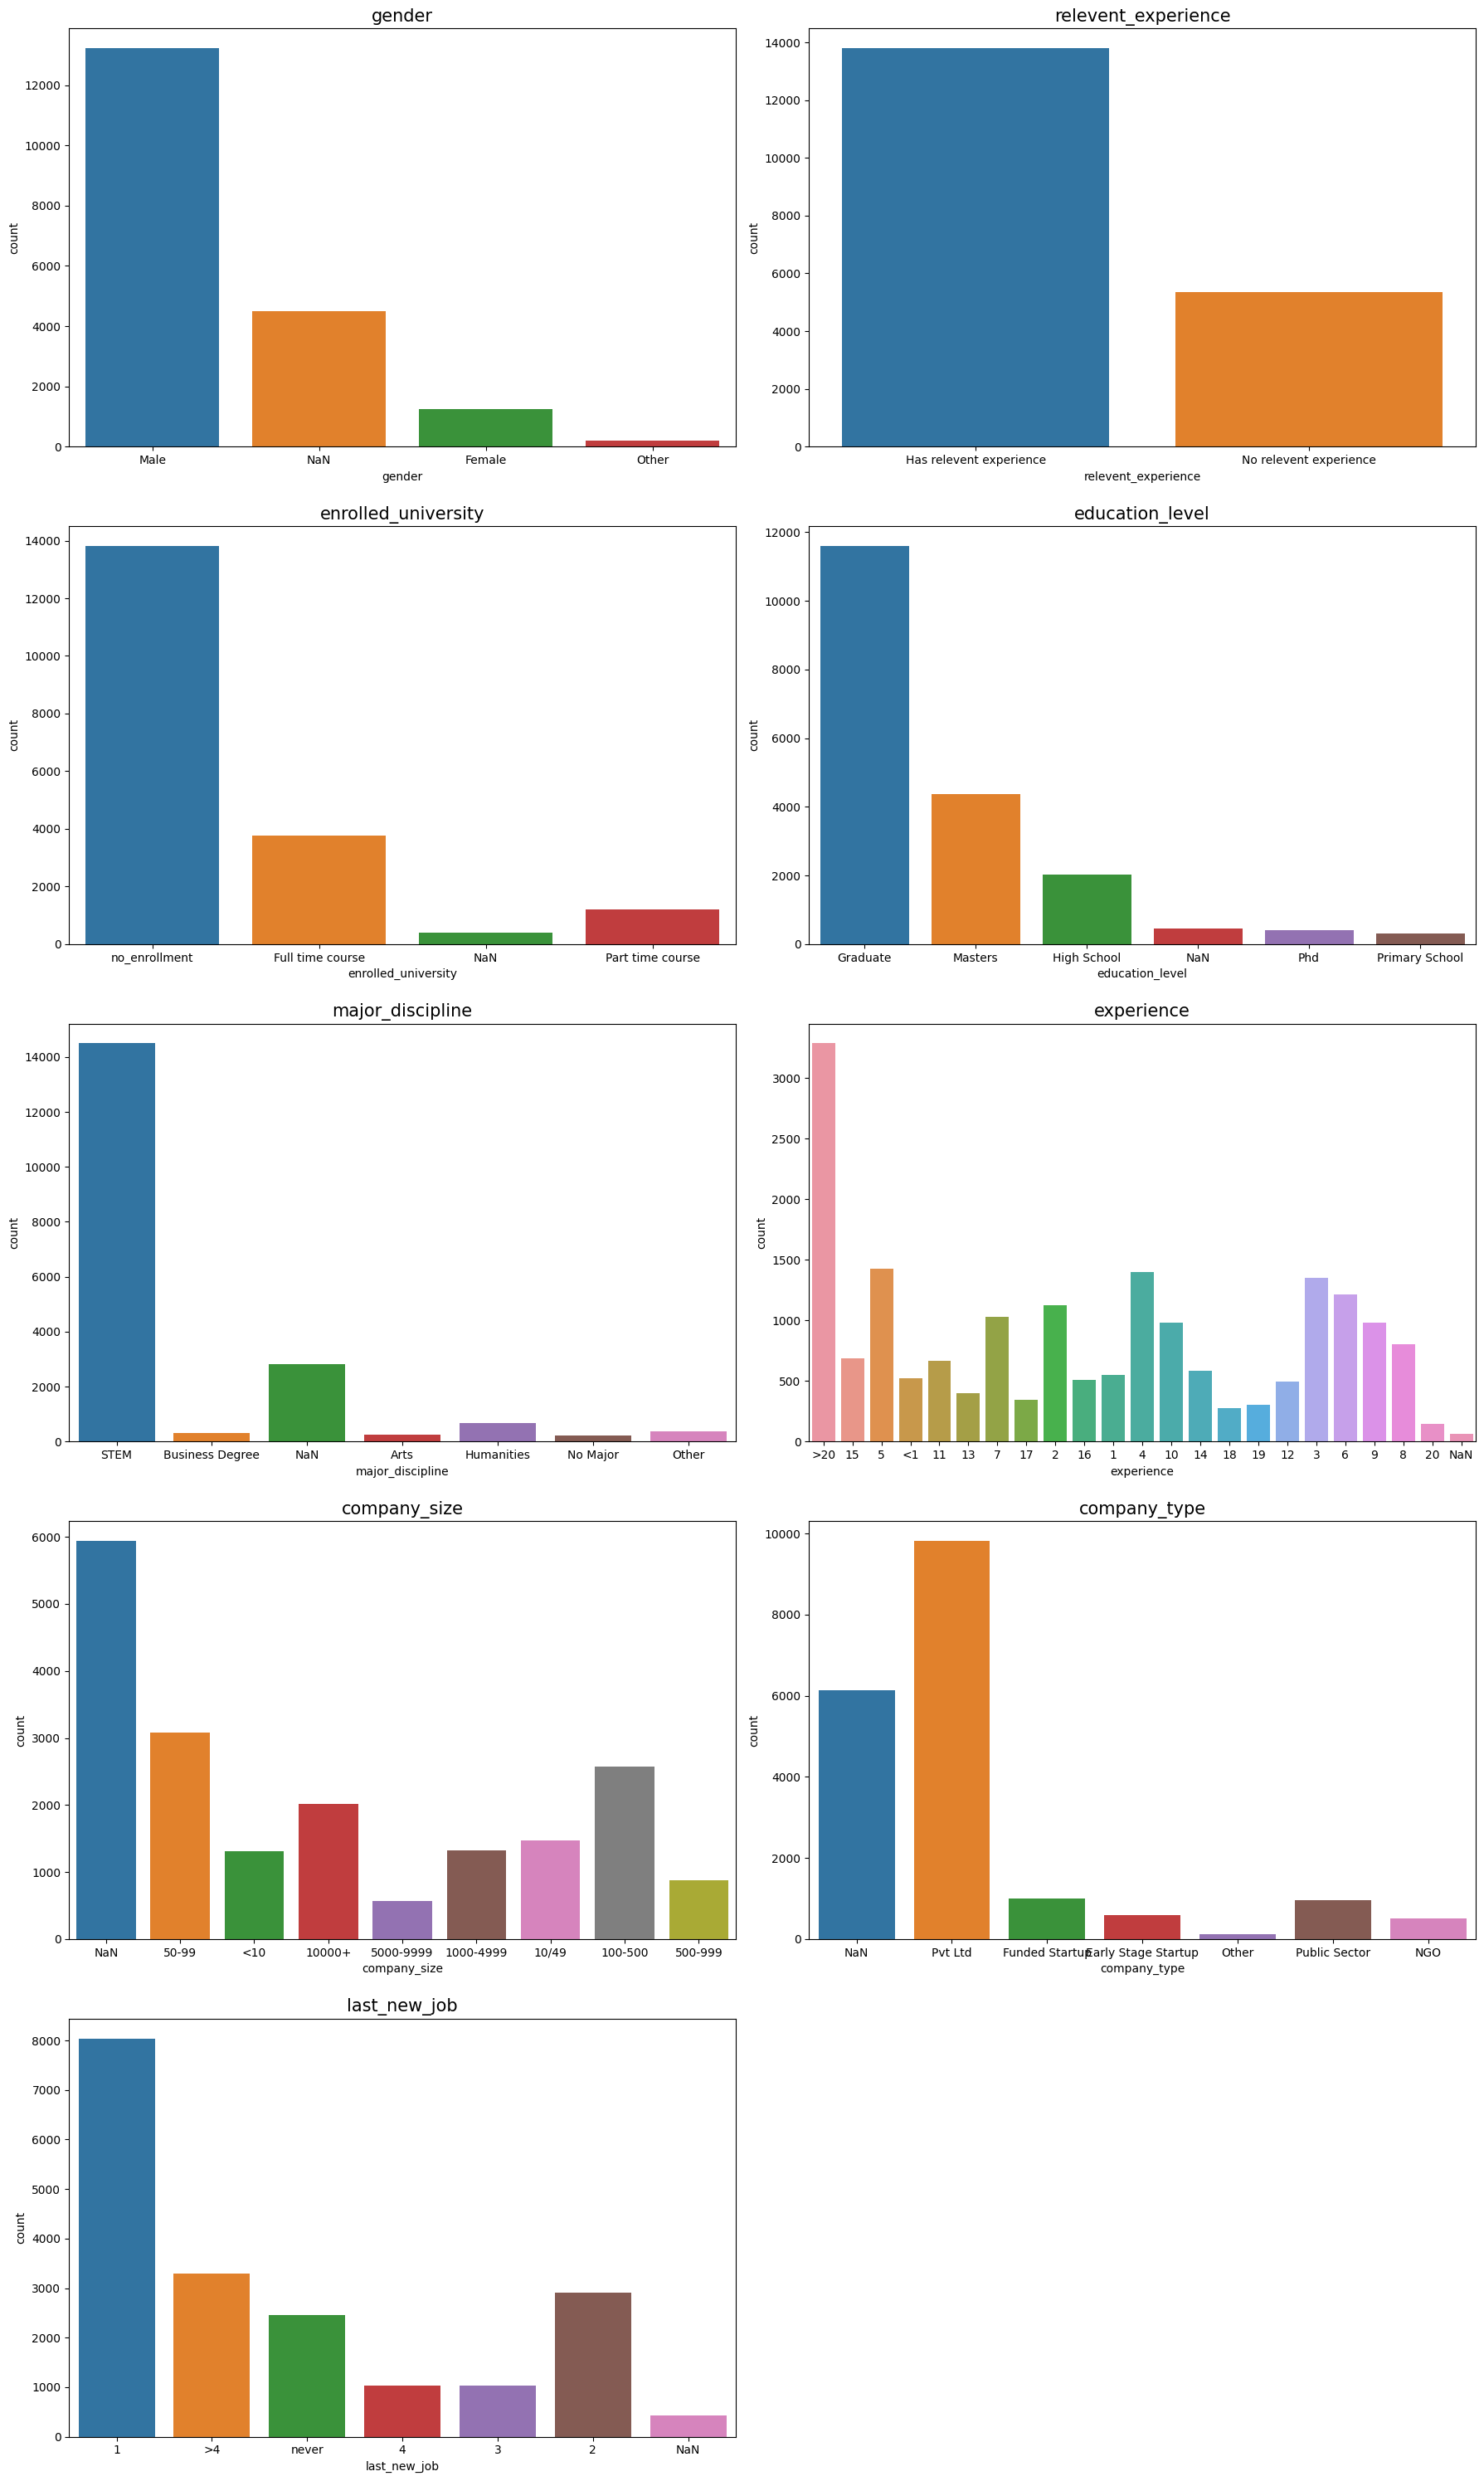

In [10]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)


# Layout
plt.tight_layout(h_pad = 2)

Text(0.5, 1.0, 'Treinamentos')

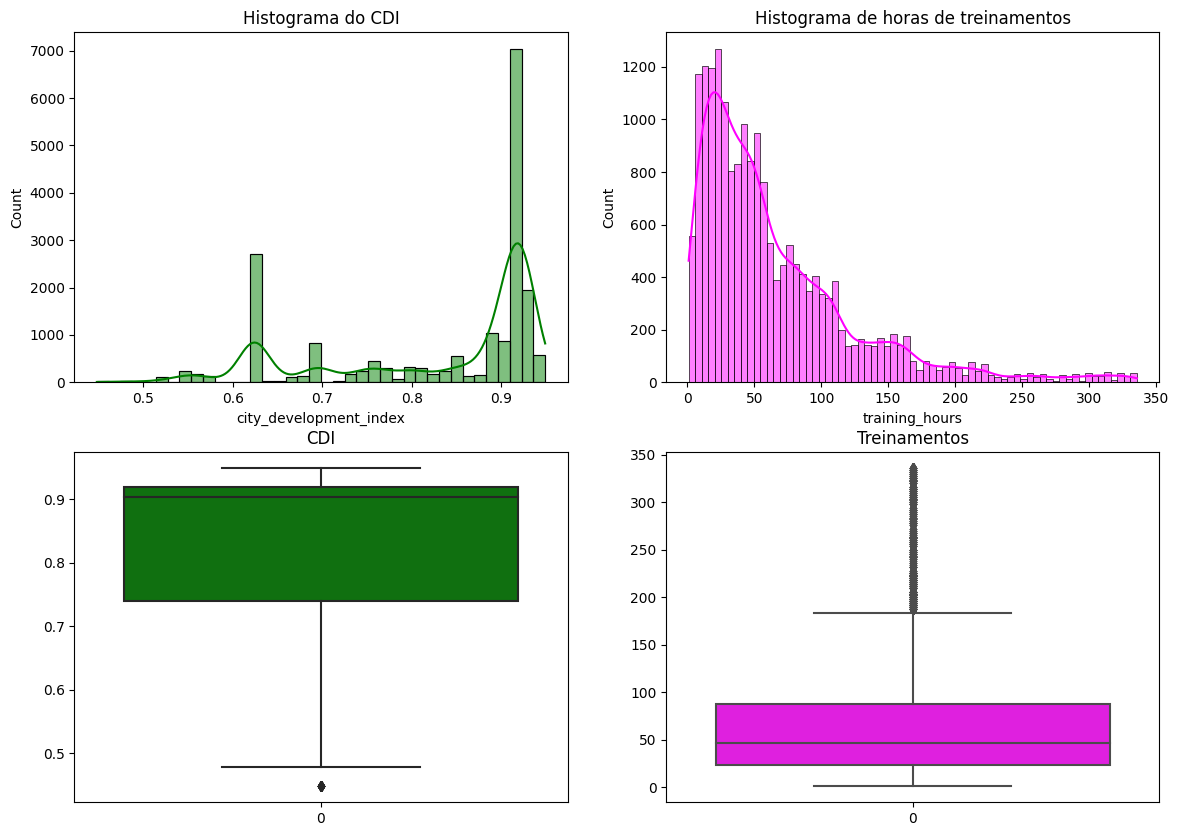

In [11]:
#Figura
plt.figure(figsize = (14, 10))

# Subplots com histogramas
#Observar distribuições bimodais, se seguem distribuições normais
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df.city_development_index, kde = True, color = 'green')
plt.title("Histograma do CDI")

plt.subplot(222)
sns.histplot(df.training_hours, kde = True, color = 'magenta')
plt.title("Histograma de horas de treinamentos")

#Subplots com boxplots
plt.subplot(223)
sns.boxplot(df.city_development_index, color = 'green')
plt.title("CDI")

plt.subplot(224)
sns.boxplot(df.training_hours, color = 'magenta')
plt.title("Treinamentos")


In [12]:
# Lista com variáveis numéricas
numerical_feature = ["city_development_index", "training_hours"]

#Loop
print("="*60)
for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, pval, ": Distribuição normal")
        print("="*60)
    else:
        print(i, pval, ": Distribuição não normal")
        print("="*60)

city_development_index 0.0 : Distribuição não normal
training_hours 0.0 : Distribuição não normal


In [13]:
df_numerical = df.copy()

In [14]:
df_numerical.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [15]:
df_numerical.experience = np.where(df_numerical.experience == "<1", 1, df_numerical.experience)
df_numerical.experience = np.where(df_numerical.experience == ">20", 21, df_numerical.experience)
df_numerical.experience = df_numerical.experience.astype(float)

In [16]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(3), int64(2), object(9)
mem

In [17]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,training_hours,target
city_development_index,1.000000,0.300997,0.007491,-0.279165
experience,0.300997,1.000000,0.003569,-0.183721
training_hours,0.007491,0.003569,1.000000,-0.014126
target,-0.279165,-0.183721,-0.014126,1.000000


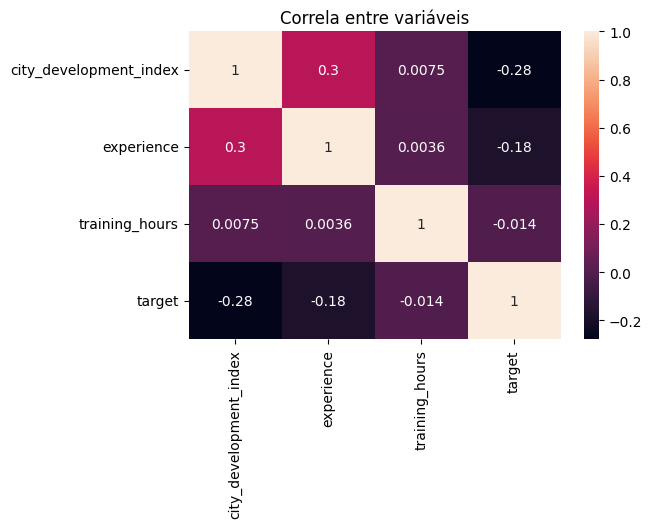

In [19]:
# hearmap
plt.figure(figsize = (6,4))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True)
plt.title("Correla entre variáveis")
plt.show()

As correlações entre as viáveis podem ser negativas, que indicam que não estão correlacionadas ou positivas, que indicam que são correlacionadas, neste caso temos

#Peso da evidência =  Percentual de eventos/ Pecentual de não eventos
O valor WOE nos diz o poder preditivo de cada compartimento (classe) de um recurso. No entanto, um único valor que representa o 
poder preditivo de todo o recurso será útil na seleção de recursos. Isso é o IV (Information Value), dado pela fórmula:
IV = sum(WOE * (percentual de eventos - percentual de não eventos)
Interpretamos o resultado de IV assim:
Information Value, Poder de Previsão
< 0.02, não deve ser usado para previsão
0.02 - 0.1, preditor fraco
0.1 -0.3, preditor médio
0.3 - 0.5, preditor forte
> 0.5, parece bom demais para ser verdade

In [23]:
#Calculando a correlação entre target e cada uma das variáveis dentro das colunas

for i in df.drop(columns = ['target', 'enrollee_id', 'city', 'city_development_index',
                            'training_hours', 'experience', 'last_new_job', 'company_size']).columns:
    df_woe_iv = (pd.crosstab(df[i], df['target'], 
                             normalize = 'columns')
                 ).assign(woe = lambda dfx: np.log(dfx[1])/dfx[0]
                          ).assign(iv = lambda dfx: np.sum(dfx['woe']
                                                           ) * (dfx[1] - dfx[0]))
    
    print(df_woe_iv, '\n ================================================================')

target      0.0       1.0         woe        iv
gender                                         
Female  0.08098  0.096222  -28.909476 -5.575081
Male    0.90650  0.889020   -0.129769  6.393690
Other   0.01252  0.014758 -336.739555 -0.818610 
target                        0.0       1.0       woe       iv
relevent_experience                                           
Has relevent experience  0.753147  0.619845 -0.635050  0.60693
No relevent experience   0.246853  0.380155 -3.918018 -0.60693 
target                    0.0       1.0        woe        iv
enrolled_university                                         
Full time course     0.164754  0.307477  -7.158260 -7.258509
Part time course     0.063465  0.064890 -43.095436 -0.072489
no_enrollment        0.771781  0.627632  -0.603541  7.330998 
target                0.0       1.0         woe         iv
education_level                                           
Graduate         0.595579  0.694415   -0.612321 -44.501343
High School      0.1157